#EVALUACIÓN FINAL: ANÁLISIS DE PREFERENCIAS MUSICALES A NIVEL GLOBAL
Trabajas en un centro de investigación de tendencias culturales y te han encargado un análisis sobre las preferencias musicales en distintos países. Tu tarea es aplicar técnicas de aprendizaje de máquina no supervisado para extraer patrones de escucha y agrupar países según sus similitudes en consumo musical.
##OBJETIVOS DE LA EVALUACIÓN
* Aplicar clusterización para encontrar grupos de países con patrones de escucha similares.
* Utilizar reducción de dimensionalidad para visualizar la estructura de los datos.
* Evaluar diferentes algoritmos y justificar sus ventajas y desventajas.
* Interpretar los resultados en un contexto cultural y social.

###INSTRUCCIONES
1. Carga y exploración de datos (1 punto)
* Carga el dataset proporcionado, que contiene información sobre la popularidad de distintos géneros musicales en países como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.
* Analiza las características del dataset, identificando distribuciones y tendencias iniciales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from google.colab import files
files.upload()

Saving dataset_generos_musicales.csv to dataset_generos_musicales.csv


{'dataset_generos_musicales.csv': b'Pa\xc3\xads,Pop,Rock,Hip-Hop,Electr\xc3\xb3nica,Cl\xc3\xa1sica,Jazz,Reguet\xc3\xb3n,Metal\nChile,71,22,79,61,70,58,79,69\nEEUU,34,41,40,79,74,37,90,23\nM\xc3\xa9xico,91,72,52,99,83,23,63,21\nCorea,80,21,95,34,22,79,27,25\nJap\xc3\xb3n,40,49,77,81,70,33,66,73\nAlemania,94,57,41,81,26,28,54,23\nRusia,94,21,68,66,40,72,97,73\nItalia,43,83,78,81,92,21,55,82\n'}

In [2]:
df = pd.read_csv('dataset_generos_musicales.csv')
display(df.head())
df.info()
df.describe()

,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
0,Chile,71,22,79,61,70,58,79,69
1,EEUU,34,41,40,79,74,37,90,23
2,México,91,72,52,99,83,23,63,21
3,Corea,80,21,95,34,22,79,27,25
4,Japón,40,49,77,81,70,33,66,73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   País         8 non-null      object
 1   Pop          8 non-null      int64 
 2   Rock         8 non-null      int64 
 3   Hip-Hop      8 non-null      int64 
 4   Electrónica  8 non-null      int64 
 5   Clásica      8 non-null      int64 
 6   Jazz         8 non-null      int64 
 7   Reguetón     8 non-null      int64 
 8   Metal        8 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 708.0+ bytes


,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000
mean,68.375000,45.750000,66.250000,72.750000,59.625000,43.875000,66.37500,48.625000
std,25.628876,23.980647,19.912308,19.337233,26.586449,22.680624,22.36028,27.650562
min,34.000000,21.000000,40.000000,34.000000,22.000000,21.000000,27.00000,21.000000
25%,42.250000,21.750000,49.250000,64.750000,36.500000,26.750000,54.75000,23.000000
50%,75.500000,45.000000,72.500000,80.000000,70.000000,35.000000,64.50000,47.000000
75%,91.750000,60.750000,78.250000,81.000000,76.250000,61.500000,81.75000,73.000000
max,94.000000,83.000000,95.000000,99.000000,92.000000,79.000000,97.00000,82.000000


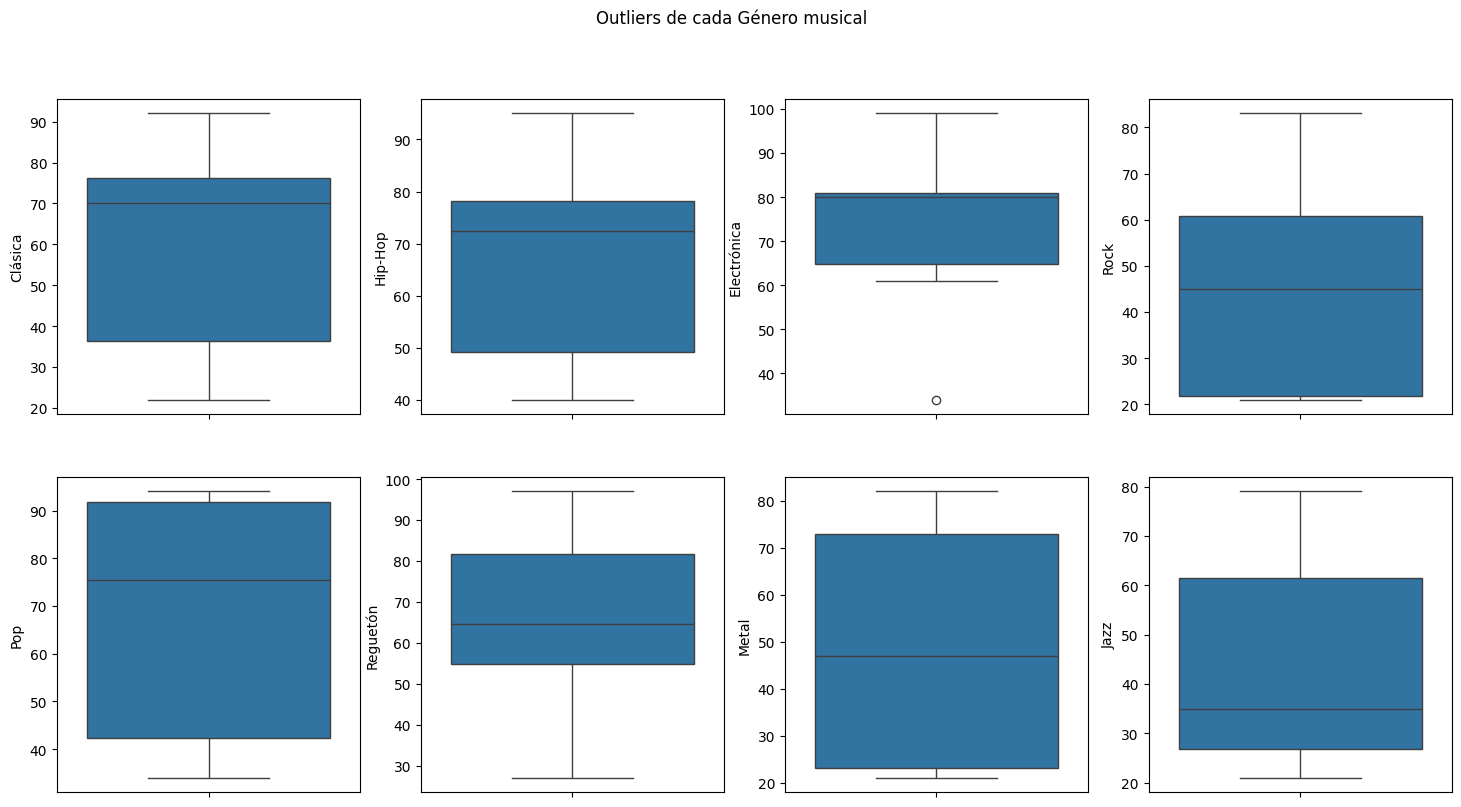

In [3]:
# Outliers por medio de Boxplots
fig,axes=plt.subplots(2,4,figsize=(18,9))
sns.boxplot(df['Clásica'],ax=axes[0,0])
sns.boxplot(df['Hip-Hop'],ax=axes[0,1])
sns.boxplot(df['Electrónica'],ax=axes[0,2])
sns.boxplot(df['Rock'],ax=axes[0,3])
sns.boxplot(df['Pop'],ax=axes[1,0])
sns.boxplot(df['Reguetón'],ax=axes[1,1])
sns.boxplot(df['Metal'],ax=axes[1,2])
sns.boxplot(df['Jazz'],ax=axes[1,3])
fig.suptitle('Outliers de cada Género musical')
plt.show()

In [4]:
print(f"En la Gráfica anterior se aprecia que la variable 'Electrónica' tiene un Outlier, por lo que se procederá a analizar en detalle esa variable para ver como tratar ese dato")

# Calcular los cuartiles Q1 y Q3
Q1 = np.percentile(df['Electrónica'], 25)
Q3 = np.percentile(df['Electrónica'], 75)

# Calcular el Rango Intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"El Rango Intercuartílico es: {IQR}")
print(f"El límite inferior es: {lower_bound:.2f}")
print(f"El límite superior es: {upper_bound:.2f}")
# Identificar los outliers
outliers = df[(df['Electrónica'] < lower_bound) | (df['Electrónica'] > upper_bound)]
outliers


En la Gráfica anterior se aprecia que la variable 'Electrónica' tiene un Outlier, por lo que se procederá a analizar en detalle esa variable para ver como tratar ese dato
El Rango Intercuartílico es: 16.25
El límite inferior es: 40.38
El límite superior es: 105.38


,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
3,Corea,80,21,95,34,22,79,27,25


In [5]:
# Identificación de duplicados

if df.duplicated().any():
    print("Hay duplicados en el DataFrame.")
    df.duplicated.show()
    df.drop_duplicates(inplace=True)
    print("Duplicados eliminados.")
    df.show()
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


In [6]:
# Resultados de exploración de data
exploracion = f"""
# Exploración de datos

Se revisó el dataset que contiene información sobre la popularidad de distintos géneros musicales en países como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.

Se observó lo siguiente:

*   El dataset contiene 8 información sobre 8 países y 8 diferentes géneros musicales.
*   No existen valores nulos.
*   No existen duplicados en el dataset.
*   Se encontró que la variable 'Electrónica' tiene un Outlier (Ver Boxplot 'Electrónica'), y al identificar cual es el valor (utilizando rango intercuartílico), se decidió conservar el dato. Esto debido a que el dataset representa la popularidad de cada género en diferentes países, y como dependiendo de la cultura de cada lugar es si se escucha más un tipo de música o otro, puede darse que en ese país el género Electrónica sea considerablemente menos escuchado que en otro.

"""

display(Markdown(exploracion))



# Exploración de datos

Se revisó el dataset que contiene información sobre la popularidad de distintos géneros musicales en países como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.

Se observó lo siguiente:

*   El dataset contiene 8 información sobre 8 países y 8 diferentes géneros musicales.
*   No existen valores nulos.
*   No existen duplicados en el dataset.
*   Se encontró que la variable 'Electrónica' tiene un Outlier (Ver Boxplot 'Electrónica'), y al identificar cual es el valor (utilizando rango intercuartílico), se decidió conservar el dato. Esto debido a que el dataset representa la popularidad de cada género en diferentes países, y como dependiendo de la cultura de cada lugar es si se escucha más un tipo de música o otro, puede darse que en ese país el género Electrónica sea considerablemente menos escuchado que en otro.



2. Aplicación de algoritmos de clusterización (5 puntos)

**K-Means:**
* Aplica el algoritmo K-Means con un valor inicial de K=3.
* Determina el valor óptimo de K utilizando el método del codo y el coeficiente de silueta.

In [7]:
# Cargar librerias
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN


In [8]:
# Creacion de copias de df original
df_kmeans = df.copy()
df_hierarchical = df.copy()
df_dbscan = df.copy()
df_kmeans

,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
0,Chile,71,22,79,61,70,58,79,69
1,EEUU,34,41,40,79,74,37,90,23
2,México,91,72,52,99,83,23,63,21
3,Corea,80,21,95,34,22,79,27,25
4,Japón,40,49,77,81,70,33,66,73
5,Alemania,94,57,41,81,26,28,54,23
6,Rusia,94,21,68,66,40,72,97,73
7,Italia,43,83,78,81,92,21,55,82


K-Means Clustering (K=3) Results:


,País,kmeans_cluster
0,Chile,1
1,EEUU,0
2,México,0
3,Corea,1
4,Japón,2
5,Alemania,0
6,Rusia,1
7,Italia,2


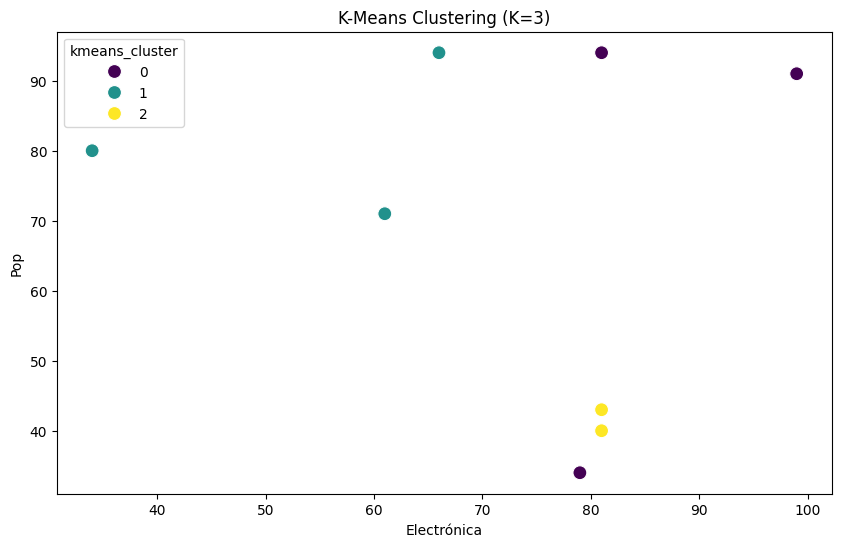

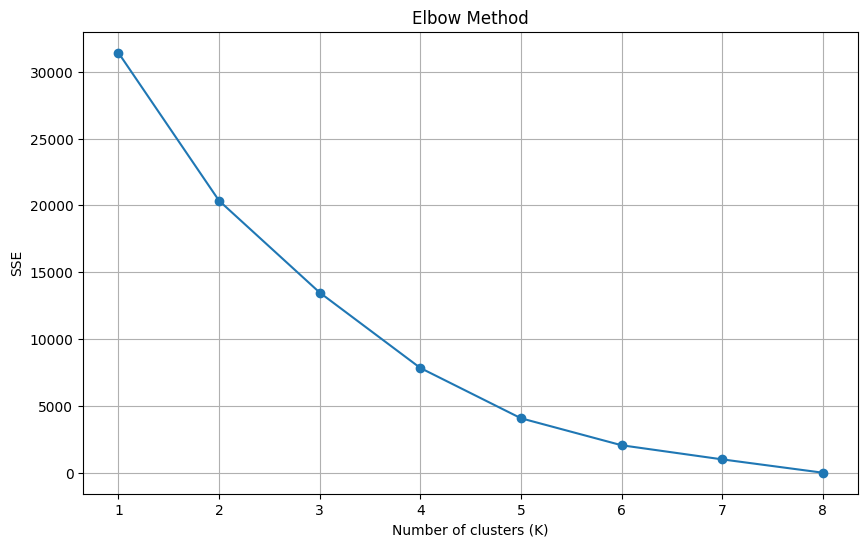

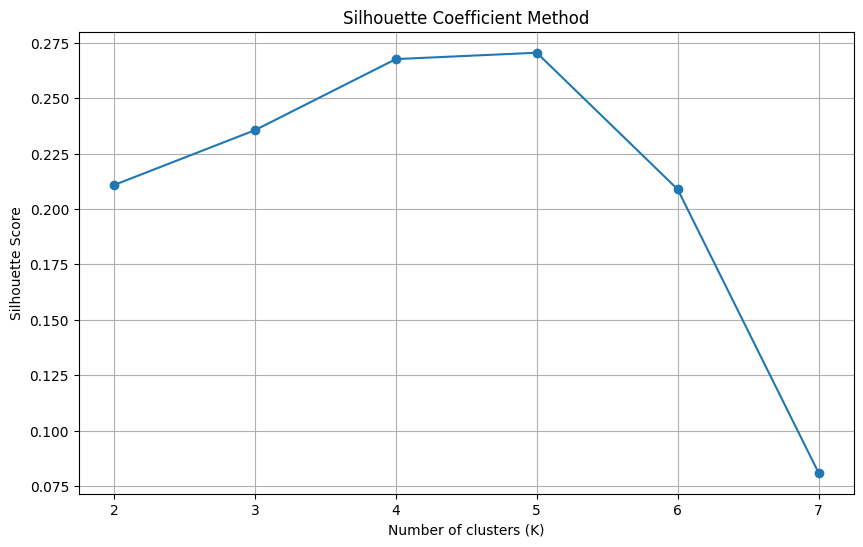

In [9]:
# Aplicar K-Means con K=3

# Separacion de data
X = df_kmeans.drop(['País'], axis=1)
y = df_kmeans['País']

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_kmeans['kmeans_cluster'] = kmeans.fit_predict(X)
df_kmeans.head()

print("K-Means Clustering (K=3) Results:")
display(df_kmeans[['País','kmeans_cluster']])

# Grafica de clusters con K=3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_kmeans['Electrónica'], y=df_kmeans['Pop'], hue=df_kmeans['kmeans_cluster'], s=100, palette='viridis')
plt.title('K-Means Clustering (K=3)')
plt.xlabel('Electrónica')
plt.ylabel('Pop')
plt.show()


# Determinar K óptimo con método del codo.
sse = []
for i in range(1, 9): # Al ser 8 países pueden ser máximo 8 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.xticks(range(1, 9))
plt.grid(True)
plt.show()

# Determinar K óptimo con coeficiente de silueta
silhouette_scores = []

# coeficiente de silueta no está deifinido para 1 cluster o n_samples clusters
for i in range(2, 8): # Valid values are 2 to n_samples - 1 (inclusive)
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 8))
plt.grid(True)
plt.show()

Al utilizar el metodo del codo y el coeficiente de silueta, se aprecia que el valor óptimo de K es 5, debido a que tiene el valor más alto de coeficiente de silueta (Ver gráfica anterior). A su vez se podría considerar un valor de k=4 ya que tiene un coeficiente de silueta relativamente similar al de k=5 y además si solo se considera el metodo del codo ambos valores son similares. Considerando esto, se procederá a realizar la clusterizacion con ambos valores de K
K-Means Clustering (K=4) Results:


,País,kmeans_cluster_k4
0,Chile,2
1,EEUU,1
2,México,1
3,Corea,0
4,Japón,3
5,Alemania,1
6,Rusia,2
7,Italia,3


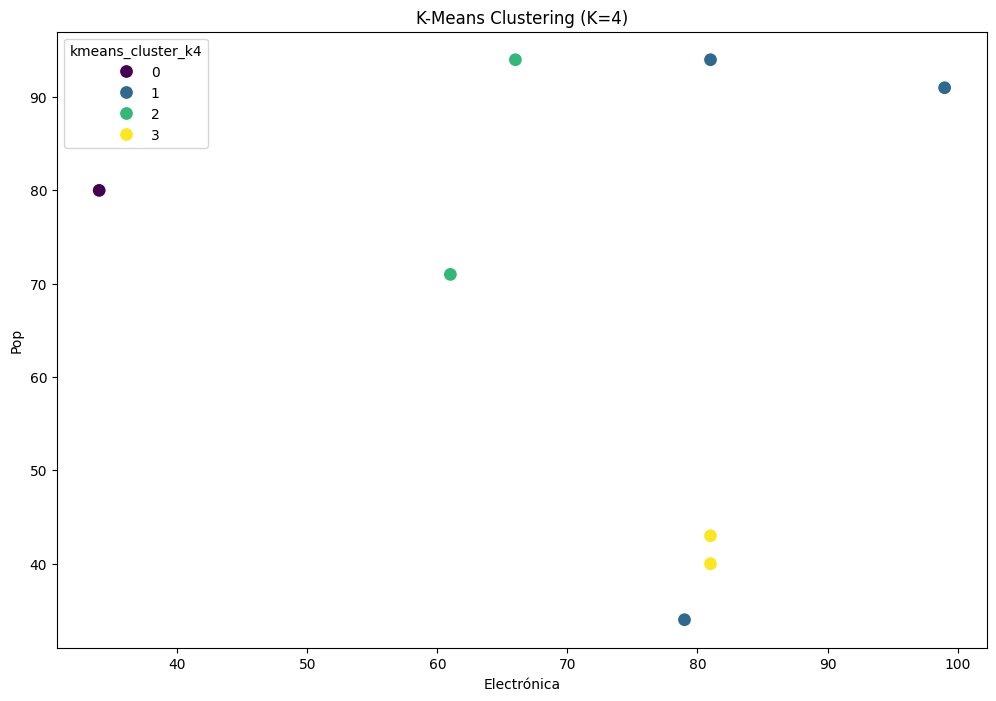

K-Means Clustering (K=5) Results:


,País,kmeans_cluster_k5
0,Chile,2
1,EEUU,4
2,México,0
3,Corea,3
4,Japón,1
5,Alemania,0
6,Rusia,2
7,Italia,1


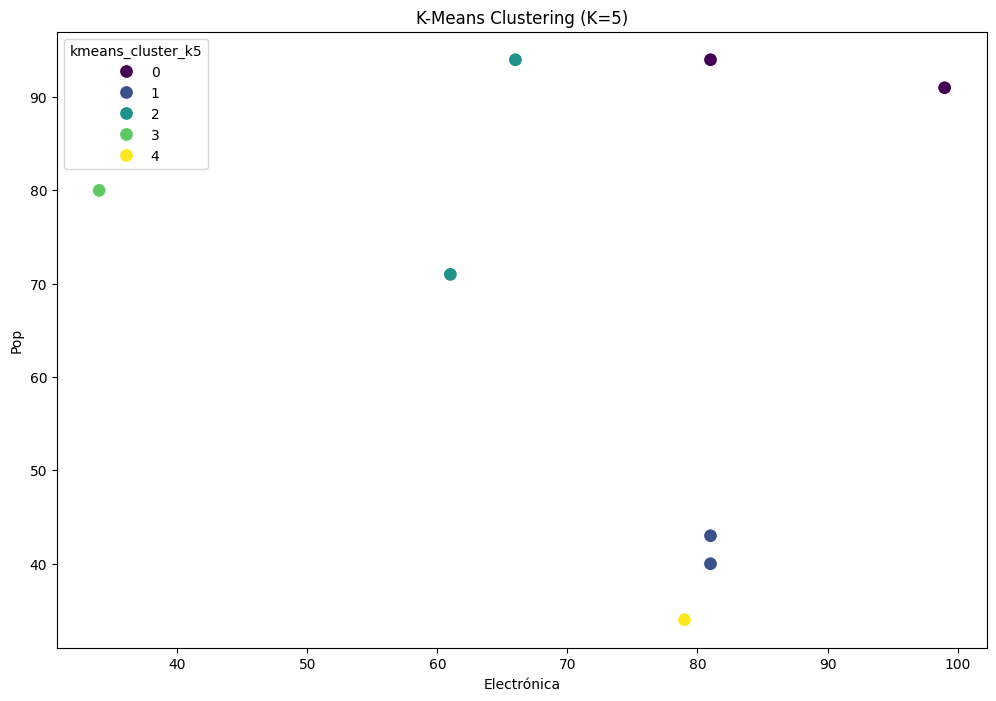

In [10]:
print(f"Al utilizar el metodo del codo y el coeficiente de silueta, se aprecia que el valor óptimo de K es 5, debido a que tiene el valor más alto de coeficiente de silueta (Ver gráfica anterior). A su vez se podría considerar un valor de k=4 ya que tiene un coeficiente de silueta relativamente similar al de k=5 y además si solo se considera el metodo del codo ambos valores son similares. Considerando esto, se procederá a realizar la clusterizacion con ambos valores de K")

# Kmeans con K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_kmeans['kmeans_cluster_k4'] = kmeans.fit_predict(X)
print("K-Means Clustering (K=4) Results:")
display(df_kmeans[['País','kmeans_cluster_k4']])

# Grafica de clusters con K=4
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_kmeans['Electrónica'], y=df_kmeans['Pop'], hue=df_kmeans['kmeans_cluster_k4'], s=100, palette='viridis')
plt.title('K-Means Clustering (K=4)')
plt.xlabel('Electrónica')
plt.ylabel('Pop')
plt.show()

# Kmeans con K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_kmeans['kmeans_cluster_k5'] = kmeans.fit_predict(X)
print("K-Means Clustering (K=5) Results:")
display(df_kmeans[['País','kmeans_cluster_k5']])

# Grafica de clusters con K=5
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_kmeans['Electrónica'], y=df_kmeans['Pop'], hue=df_kmeans['kmeans_cluster_k5'], s=100, palette='viridis')
plt.title('K-Means Clustering (K=5)')
plt.xlabel('Electrónica')
plt.ylabel('Pop')
plt.show()


2. (Continuación)

**Clustering jerárquico:**
* Genera un dendrograma y determina el número óptimo de clusters.
* Aplica clustering jerárquico y compara con los resultados de K-Means.


In [11]:
from scipy.cluster.hierarchy import fcluster

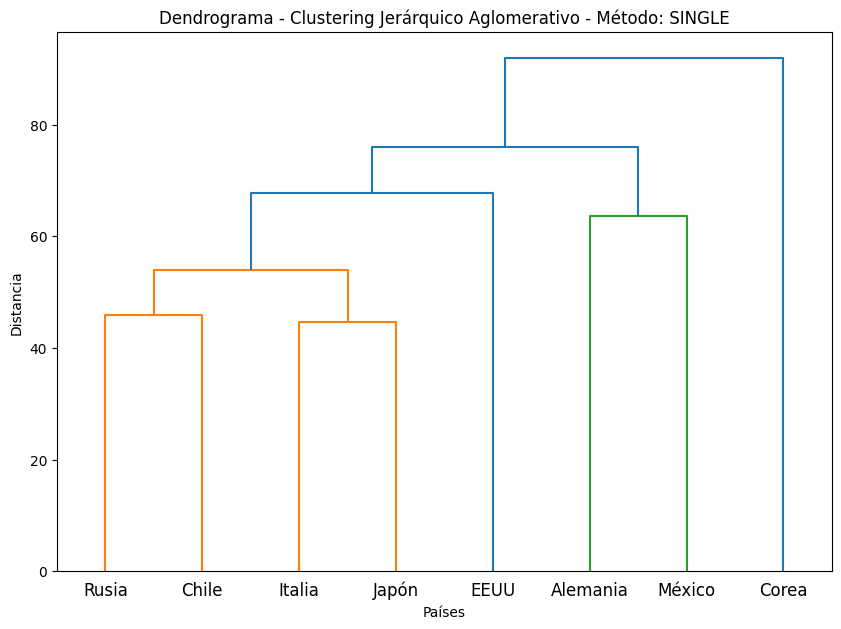

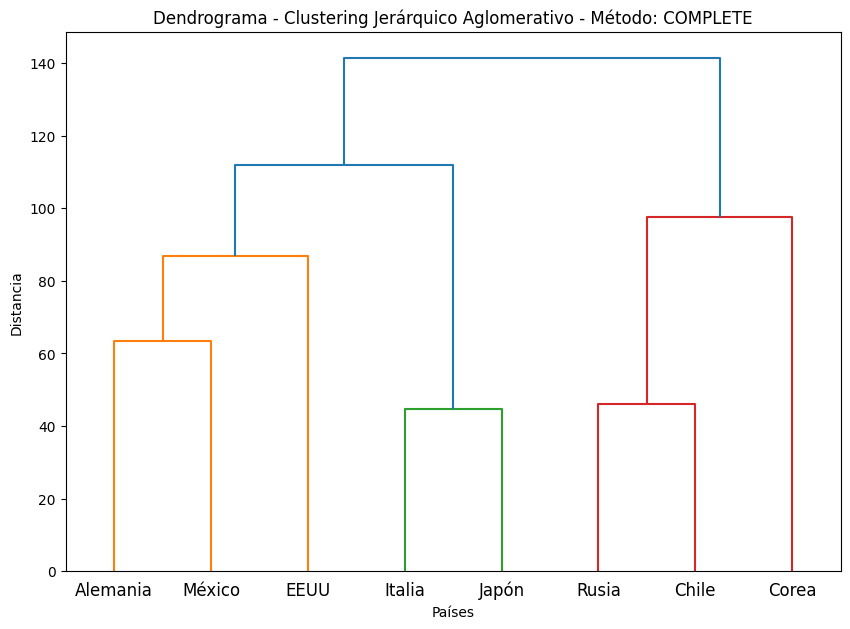

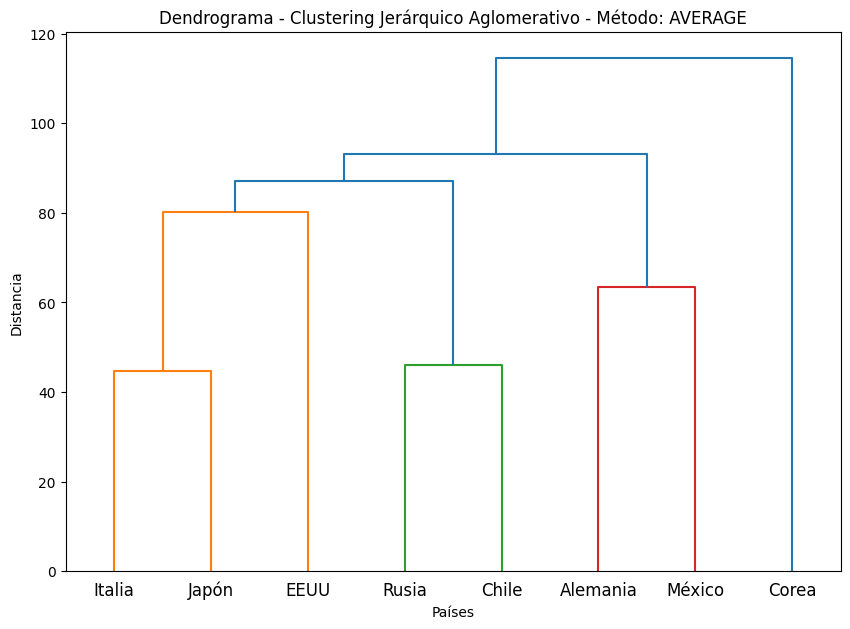

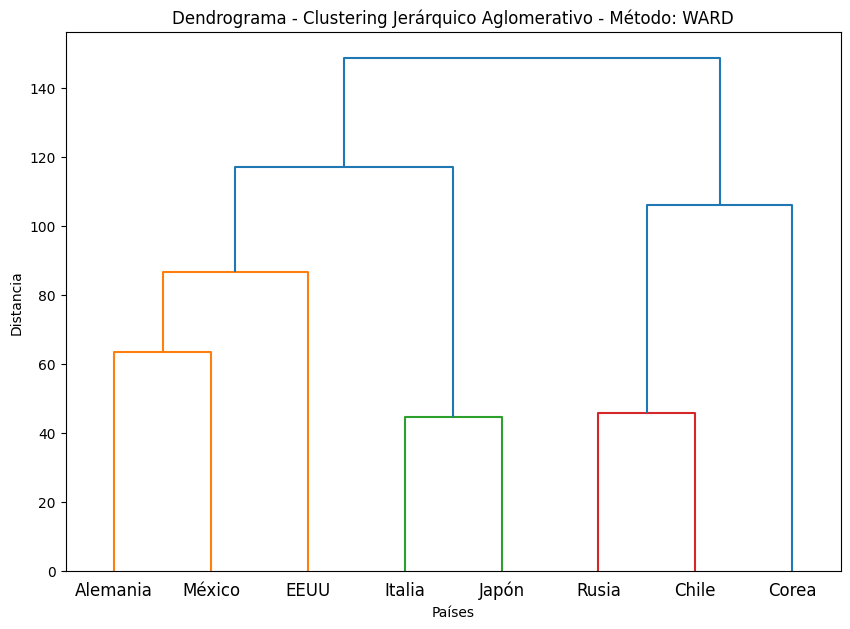

In [12]:
# Clustering jerárquico Aglomerativo
method = ['single', 'complete', 'average', 'ward']
for i in method:
    linked = linkage(df_hierarchical.drop(['País'], axis=1), method=i)
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
            orientation='top',
            labels=df['País'].tolist(),
            distance_sort='descending',
            show_leaf_counts=True)
    plt.title(f"Dendrograma - Clustering Jerárquico Aglomerativo - Método: {i.upper()}")
    plt.xlabel('Países')
    plt.ylabel('Distancia')
    plt.show()

In [13]:
# Comparacion Kmeans y Clustering Jerarquico

comparacion_kmean_jerarquico = f"""
#Comparacion de Algoritmos Kmeans y Clustering Jerárquico
##K-Means:
Utilizando el método kmeans se encontró que al buscar el valor del K óptimo con el método del codo y el coeficiente de silueta, se obtuvo que el valor óptimo de K es 5, debido a que tiene el valor más alto de coeficiente de silueta (Ver gráfica anterior). A su vez se podría considerar un valor de k=4, ya que tiene un coeficiente de silueta relativamente similar al de k=5 y además si solo se considera el metodo del codo ambos valores son similares. Es por eso que se realizó la clusterización con ambos valores de K.

A continuación se muestran los resultados obetenidos con cada valor de K:

Valor de K|Grupo 0|Grupo 1|Grupo 2|Grupo 3|Grupo 4
:---:|:---:|:---:|:---:|:---:|:---:
4|Corea|EEUU-México-Alemania|Chile-Rusia|Japón-Italia|
5|México-Alemania|Japón- Italia|Rusia-Chile|Corea|EEUU|

##Clustering Jerarquico:
Utilizando el método de Clusterización Jerárquico se obtuvieron distintos números de clusters y agrupaciones dependiendo del tipo de método utilizado (single, complete, average, ward). Este algoritmo a diferencia de Kmeans, entregó entre 3 y 4 clusters (no 5).

A continuación se muestran los resultados obtenidos con cada método:

Método|Grupo 0|Grupo 1|Grupo 2|Grupo 3
:---:|:---:|:---:|:---:|:---:|
Single|Rusia-Chile-Italia-Japón|EEUU|México-Alemania|Corea
Complete|México-Alemania-EEUU|Japón- Italia|Rusia-Chile-Corea
Average|EEUU-Japón- Italia|Rusia-Chile|México-Alemania|Corea
Ward|México-Alemania-EEUU|Japón- Italia|Rusia-Chile|Corea|

## Conclusiones:
Si comparamos los 2 algoritmos utilizados, se tiene que ambos son bastante similares al momento de agrupar los países en distintos grupos, y además el kmeans con K=4 y la clusterización jerárquica con el metodo Ward generan ambos las mismas agrupaciones de países, por lo que podria considerarse esa agrupacion como la posible a considerar.

(Agrupación a considerar)
Grupo 0|Grupo 1|Grupo 2|Grupo 3
Corea|EEUU-México-Alemania|Chile-Rusia|Japón-Italia|
"""
display(Markdown(comparacion_kmean_jerarquico))





#Comparacion de Algoritmos Kmeans y Clustering Jerárquico
##K-Means:
Utilizando el método kmeans se encontró que al buscar el valor del K óptimo con el método del codo y el coeficiente de silueta, se obtuvo que el valor óptimo de K es 5, debido a que tiene el valor más alto de coeficiente de silueta (Ver gráfica anterior). A su vez se podría considerar un valor de k=4, ya que tiene un coeficiente de silueta relativamente similar al de k=5 y además si solo se considera el metodo del codo ambos valores son similares. Es por eso que se realizó la clusterización con ambos valores de K. 

A continuación se muestran los resultados obetenidos con cada valor de K:

Valor de K|Grupo 0|Grupo 1|Grupo 2|Grupo 3|Grupo 4
:---:|:---:|:---:|:---:|:---:|:---:
4|Corea|EEUU-México-Alemania|Chile-Rusia|Japón-Italia|
5|México-Alemania|Japón- Italia|Rusia-Chile|Corea|EEUU|

##Clustering Jerarquico:
Utilizando el método de Clusterización Jerárquico se obtuvieron distintos números de clusters y agrupaciones dependiendo del tipo de método utilizado (single, complete, average, ward). Este algoritmo a diferencia de Kmeans, entregó entre 3 y 4 clusters (no 5). 

A continuación se muestran los resultados obtenidos con cada método:

Método|Grupo 0|Grupo 1|Grupo 2|Grupo 3
:---:|:---:|:---:|:---:|:---:|
Single|Rusia-Chile-Italia-Japón|EEUU|México-Alemania|Corea
Complete|México-Alemania-EEUU|Japón- Italia|Rusia-Chile-Corea
Average|EEUU-Japón- Italia|Rusia-Chile|México-Alemania|Corea
Ward|México-Alemania-EEUU|Japón- Italia|Rusia-Chile|Corea|

## Conclusiones:
Si comparamos los 2 algoritmos utilizados, se tiene que ambos son bastante similares al momento de agrupar los países en distintos grupos, y además el kmeans con K=4 y la clusterización jerárquica con el metodo Ward generan ambos las mismas agrupaciones de países, por lo que podria considerarse esa agrupacion como la posible a considerar.

(Agrupación a considerar)
Grupo 0|Grupo 1|Grupo 2|Grupo 3
Corea|EEUU-México-Alemania|Chile-Rusia|Japón-Italia|


2. (Continuación)

**DBSCAN:**
* Aplica DBSCAN con diferentes valores de eps y MinPts.
* Justifica la elección de los parámetros y analiza si DBSCAN identifica agrupaciones significativas.

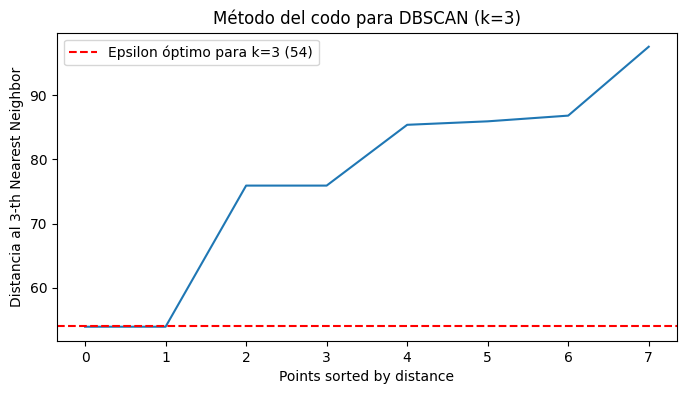

El valor óptimo de epsilon es 54


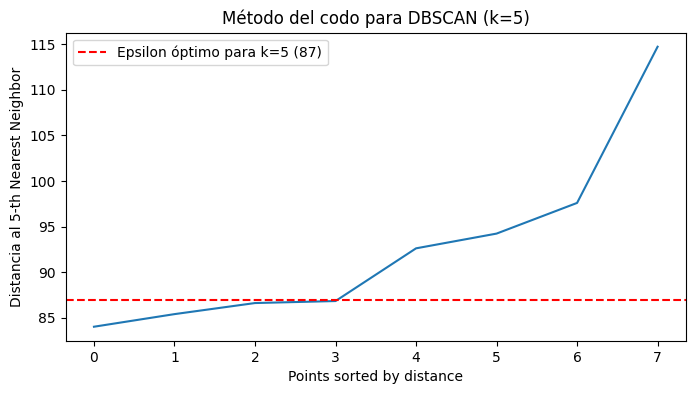

El valor optimo de epsilon es 87


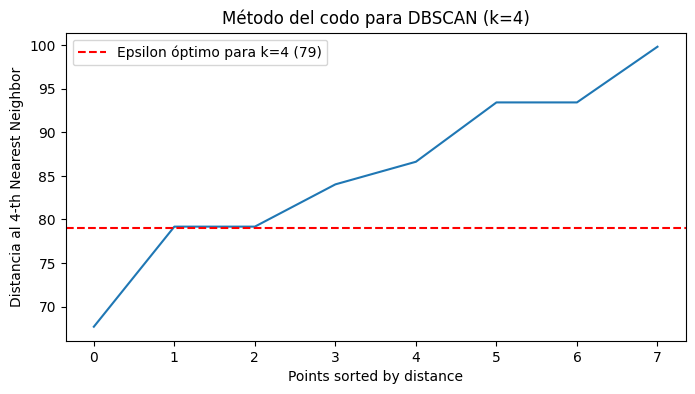

El valor optimo de epsilon es 79


In [14]:
#Aplicación DBSCAN
# eps optimo
from sklearn.neighbors import NearestNeighbors
#K=3
k =3
data_nn = df_dbscan.drop(['País'],axis=1)

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,k-1] # Corrected to get the distance to the k-th neighbor

i = np.arange(len(distances))

#Grafica metodo del codo para encontra valor optimode eps.
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x = i, y = distances) # Get the axes object
ax.axhline(y = 54, color='red', linestyle='--', label=f'Epsilon óptimo para k={k} (54)') # Draw horizontal line
plt.title(f'Método del codo para DBSCAN (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distancia al {k}-th Nearest Neighbor')
plt.legend()
plt.show()

print(f"El valor óptimo de epsilon es 54")

# K=5
k =5
data_nn = df_dbscan.drop(['País'],axis=1)

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,k-1] # Corrected to get the distance to the k-th neighbor

i = np.arange(len(distances))

#Grafica metodo del codo para encontra valor optimode eps.
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x = i, y = distances) # Get the axes object
ax.axhline(y = 87, color='red', linestyle='--', label=f'Epsilon óptimo para k={k} (87)') # Draw horizontal line
plt.title(f'Método del codo para DBSCAN (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distancia al {k}-th Nearest Neighbor')
plt.legend()
plt.show()

print(f"El valor optimo de epsilon es 87")

k =4 #Se utilizara este valor debido a que es el valor de K optimo encontrado con el coeficiente de silueta y codo en Kmeans.
data_nn = df_dbscan.drop(['País'],axis=1)

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,k-1] # Corrected to get the distance to the k-th neighbor

i = np.arange(len(distances))

#Grafica metodo del codo para encontra valor optimode eps.
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x = i, y = distances) # Get the axes object
ax.axhline(y = 79, color='red', linestyle='--', label=f'Epsilon óptimo para k={k} (79)') # Draw horizontal line
plt.title(f'Método del codo para DBSCAN (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distancia al {k}-th Nearest Neighbor')
plt.legend()
plt.show()

print(f"El valor optimo de epsilon es 79")

De la grafica anterior, se tiene que el valor optimo de epsilon es 79 y el valor de min_samples es igual a K, es decir, 4
DBSCAN Clustering Results:


,País,dbscan_cluster
0,Chile,0
1,EEUU,-1
2,México,-1
3,Corea,-1
4,Japón,0
5,Alemania,-1
6,Rusia,0
7,Italia,0


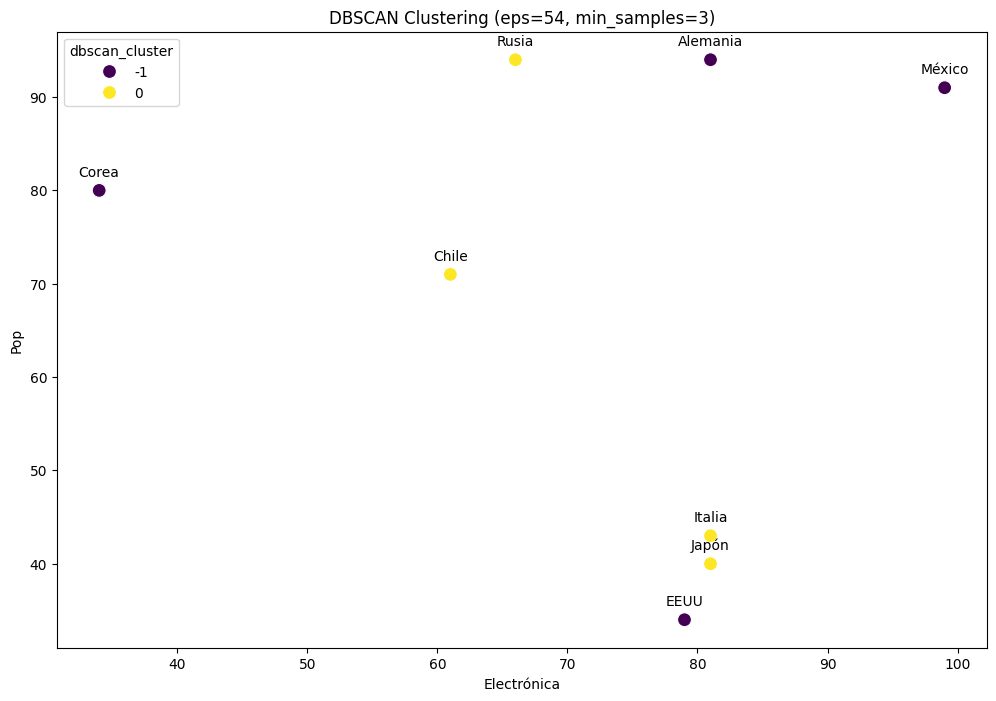

DBSCAN Clustering Results:


,País,dbscan_cluster
0,Chile,0
1,EEUU,0
2,México,0
3,Corea,-1
4,Japón,0
5,Alemania,0
6,Rusia,0
7,Italia,0


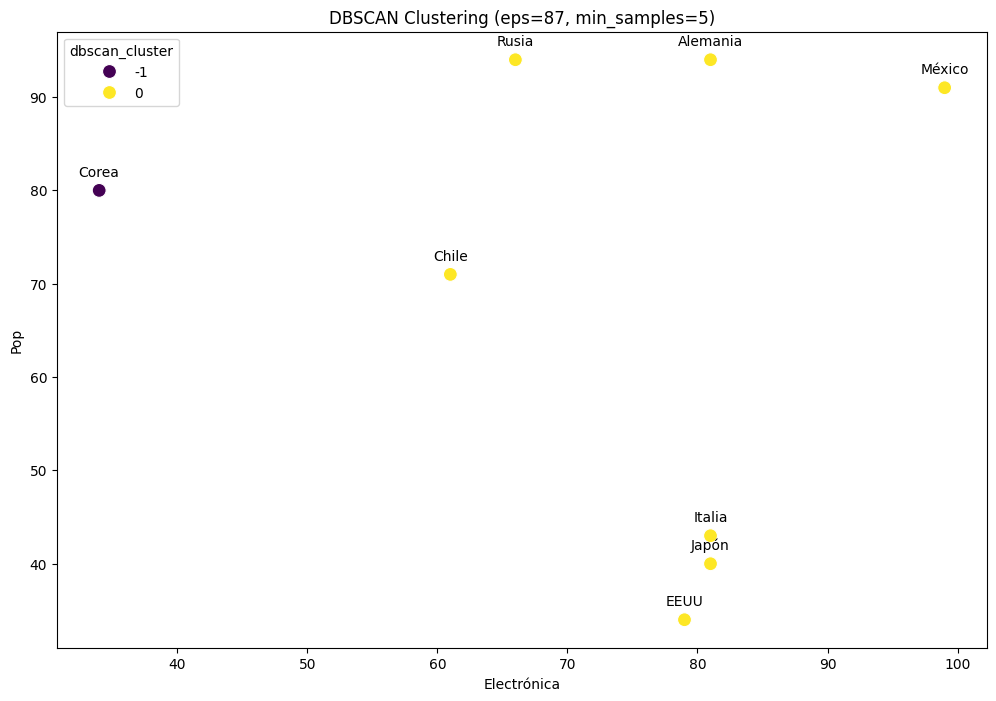

DBSCAN Clustering Results:


,País,dbscan_cluster
0,Chile,0
1,EEUU,0
2,México,-1
3,Corea,-1
4,Japón,0
5,Alemania,-1
6,Rusia,-1
7,Italia,0


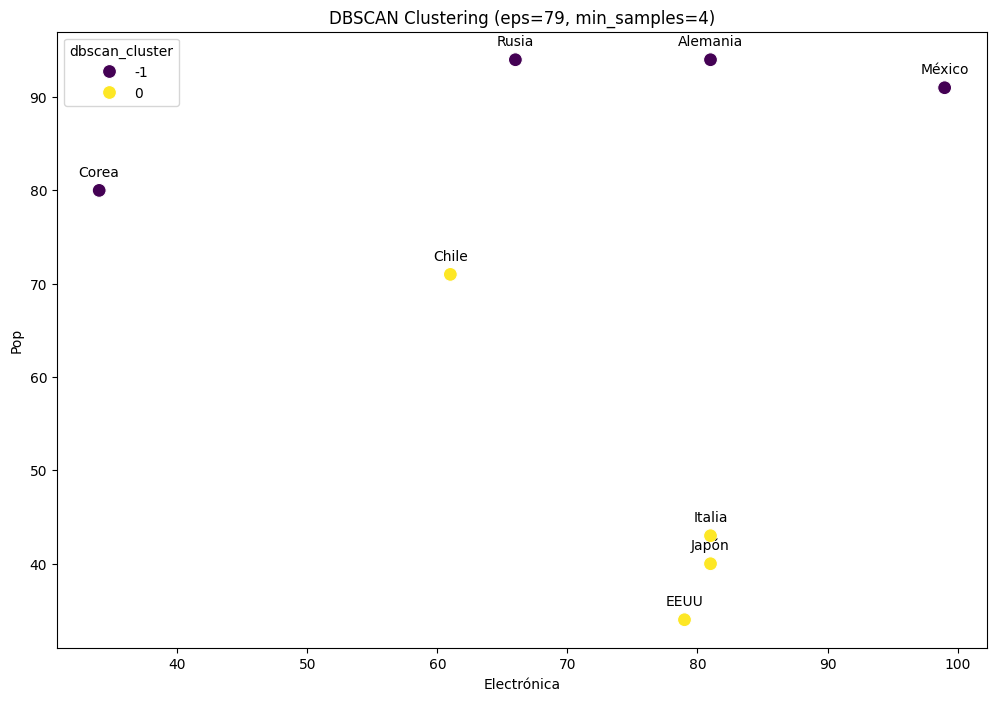

In [15]:

print(f"De la grafica anterior, se tiene que el valor optimo de epsilon es 79 y el valor de min_samples es igual a K, es decir, 4")
eps=54
min_samples_val = 3

# Aplicación DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples_val)
label = dbscan.fit_predict(X)
df_dbscan['dbscan_cluster'] = label
print("DBSCAN Clustering Results:")
display(df_dbscan[['País','dbscan_cluster']])

#Visualizacion de Clusters usando DBSCAN con eps=54 y min_samples=3
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_dbscan['Electrónica'], y=df_dbscan['Pop'], hue=df_dbscan['dbscan_cluster'], s=100, palette='viridis')
for i, country in enumerate(df_dbscan['País']):
    plt.annotate(country, (df_dbscan['Electrónica'][i], df_dbscan['Pop'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples_val})")
plt.xlabel('Electrónica')
plt.ylabel('Pop')
plt.show()


eps=87
min_samples_val = 5

# Aplicación DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples_val)
label = dbscan.fit_predict(X)
df_dbscan['dbscan_cluster'] = label
print("DBSCAN Clustering Results:")
display(df_dbscan[['País','dbscan_cluster']])

#Visualizacion de Clusters usando DBSCAN con eps=54 y min_samples=3
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_dbscan['Electrónica'], y=df_dbscan['Pop'], hue=df_dbscan['dbscan_cluster'], s=100, palette='viridis')
for i, country in enumerate(df_dbscan['País']):
    plt.annotate(country, (df_dbscan['Electrónica'][i], df_dbscan['Pop'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples_val})")
plt.xlabel('Electrónica')
plt.ylabel('Pop')
plt.show()


eps=79
min_samples_val = k

# Aplicación DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples_val)
label = dbscan.fit_predict(X)
df_dbscan['dbscan_cluster'] = label
print("DBSCAN Clustering Results:")
display(df_dbscan[['País','dbscan_cluster']])

#Visualizacion de Clusters usando DBSCAN con eps=54 y min_samples=3
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_dbscan['Electrónica'], y=df_dbscan['Pop'], hue=df_dbscan['dbscan_cluster'], s=100, palette='viridis')
for i, country in enumerate(df_dbscan['País']):
    plt.annotate(country, (df_dbscan['Electrónica'][i], df_dbscan['Pop'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples_val})")
plt.xlabel('Electrónica')
plt.ylabel('Pop')
plt.show()

In [16]:
dbscan_analisis = f"""
#Resultados
Al realizar el análisis de clusterización utilizando DBSCAN, se tomaron las siguientes consideraciones:


*   Lo primero fue tratar de identificar gráficamente el valor de eps. Para esto se utilizó el algoritmo de nearest_neighbors con el valor de K=('3,4,5') encontrándose 3 valores de eps(54,79,87). Al mirar las gráficas de los clusters encontrados se decide que se utilizará el valor de eps=79 valor obtenido con k=4
*   El valor de MinPts se definió como el valor de k utilizado para encontrar el valor óptimo de epsilon. Esta consideración se tomó debido a que estudiando estos algoritmos, la teoría indica que esta es una buena aproximación a considerar para definir el valor de MinPts o min_samples, por lo que se consideró que 'min_samples=4'.


Entonces, al aplicar DBSCAN con eps=79 y min_samples=4, el algoritmo encontró 2 diferentes agrupaciones de países:


*   Cluster 1 = Chile, Italia, Japón, EEUU.
*   Cluster 2 = Alemania, Rusia, Corea, México.


Hay que tener presente que el Cluster 2, el algoritmo lo considera como outliers del conjunto, pero en este caso se considerará como un cluster más. Al mirar las agrupaciones en la gráfica se aprecia que los países que componen cada cluster se encuentran cercanos espacialmente, pero existen algunos que se alejan de la mayoría del grupo, por lo que quizás este modelo no es el más adecuado para la clusterización de estos datos.


Finalmente, debido a que la data que se está utilizando es pequeña, es más caótico tratar de modelar la data por medio de DBSCAN. La definición de los parámetros eps y min_samples para este set de datos fue difícil. El algoritmo no estaba clusterizando datos, al utilizar los parámetros incorrectos, por lo que la definición de estos es totalmente crucial.

"""
display(Markdown(dbscan_analisis))



#Resultados
Al realizar el análisis de clusterización utilizando DBSCAN, se tomaron las siguientes consideraciones:


*   Lo primero fue tratar de identificar gráficamente el valor de eps. Para esto se utilizó el algoritmo de nearest_neighbors con el valor de K=('3,4,5') encontrándose 3 valores de eps(54,79,87). Al mirar las gráficas de los clusters encontrados se decide que se utilizará el valor de eps=79 valor obtenido con k=4
*   El valor de MinPts se definió como el valor de k utilizado para encontrar el valor óptimo de epsilon. Esta consideración se tomó debido a que estudiando estos algoritmos, la teoría indica que esta es una buena aproximación a considerar para definir el valor de MinPts o min_samples, por lo que se consideró que 'min_samples=4'.


Entonces, al aplicar DBSCAN con eps=79 y min_samples=4, el algoritmo encontró 2 diferentes agrupaciones de países:


*   Cluster 1 = Chile, Italia, Japón, EEUU.
*   Cluster 2 = Alemania, Rusia, Corea, México.


Hay que tener presente que el Cluster 2, el algoritmo lo considera como outliers del conjunto, pero en este caso se considerará como un cluster más. Al mirar las agrupaciones en la gráfica se aprecia que los países que componen cada cluster se encuentran cercanos espacialmente, pero existen algunos que se alejan de la mayoría del grupo, por lo que quizás este modelo no es el más adecuado para la clusterización de estos datos.


Finalmente, debido a que la data que se está utilizando es pequeña, es más caótico tratar de modelar la data por medio de DBSCAN. La definición de los parámetros eps y min_samples para este set de datos fue difícil. El algoritmo no estaba clusterizando datos, al utilizar los parámetros incorrectos, por lo que la definición de estos es totalmente crucial.



3. Aplicación de reducción de dimensionalidad (3 puntos)

**PCA:**
* Aplica PCA y determina cuántos componentes principales explican al menos el 90% de la varianza.
* Visualiza los países en un gráfico bidimensional con las primeras dos componentes principales.

**t-SNE:**
* Aplica t-SNE para visualizar la relación entre los países en un espacio de 2D.
* Experimenta con diferentes valores de perplexity y analiza cómo afectan la representación.

In [17]:
df_pca = df.copy()
df_tsne = df.copy()
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

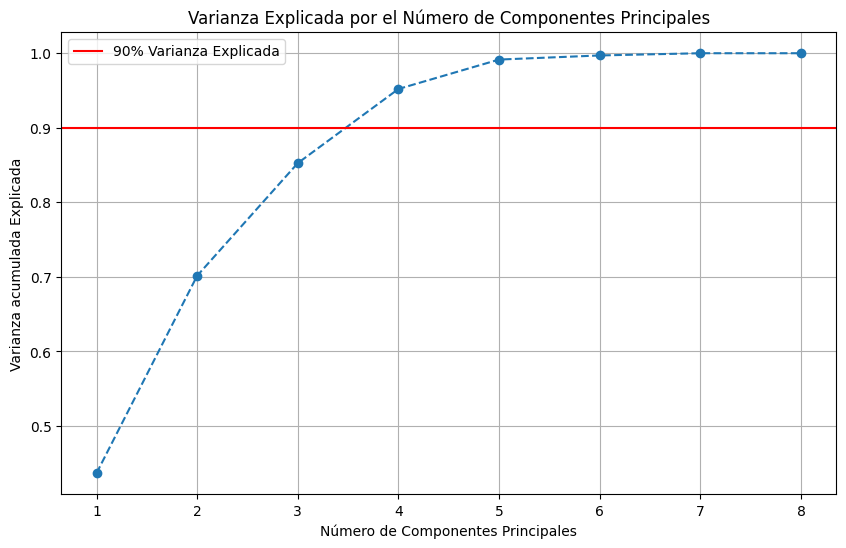

Número de Componentes explicando al menos 90% de la varianza: 4


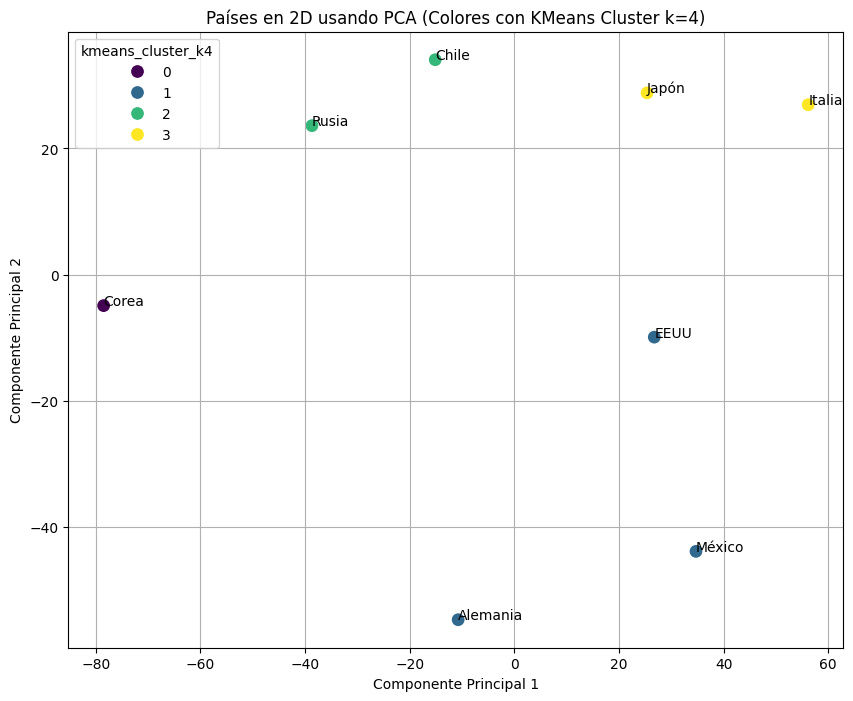

In [18]:
# Apply PCA
pca = PCA()
# Drop only the 'País' column for PCA on the original data
X_pca = pca.fit_transform(df.drop(['País'], axis=1))

# Determine the number of components that explain at least 90% of the variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada por el Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza acumulada Explicada')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Varianza Explicada')
plt.legend()
plt.grid(True)
plt.show()

# Find the number of components for 90% variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"Número de Componentes explicando al menos 90% de la varianza: {n_components_90}")

# Visualize the countries in a 2D plot with the first two principal components, colored by KMeans cluster
pca_2d = PCA(n_components=2)
# Drop only the 'País' column for PCA on the original data
X_pca_2d = pca_2d.fit_transform(df.drop(['País'], axis=1))

plt.figure(figsize=(10, 8))
# Use the 'kmeans_cluster' column from df_kmeans for coloring
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=df_kmeans['kmeans_cluster_k4'], s=100, palette='viridis')
for i, country in enumerate(df['País']):
    plt.text(X_pca_2d[i, 0], X_pca_2d[i, 1], country)
plt.title('Países en 2D usando PCA (Colores con KMeans Cluster k=4)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


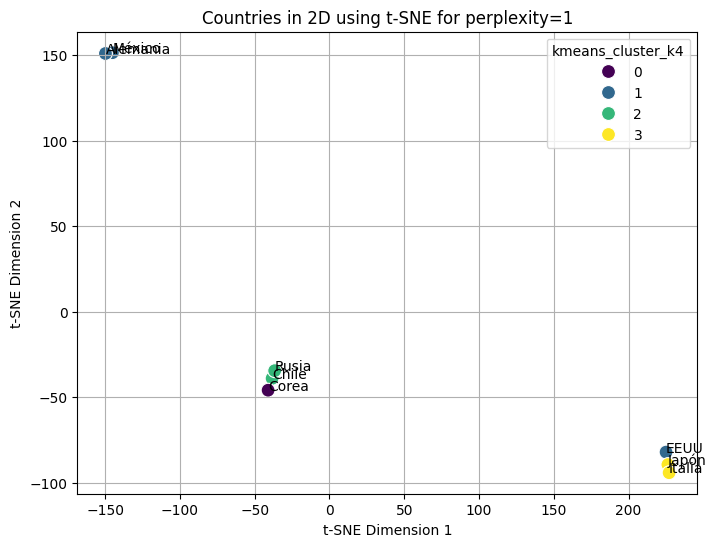

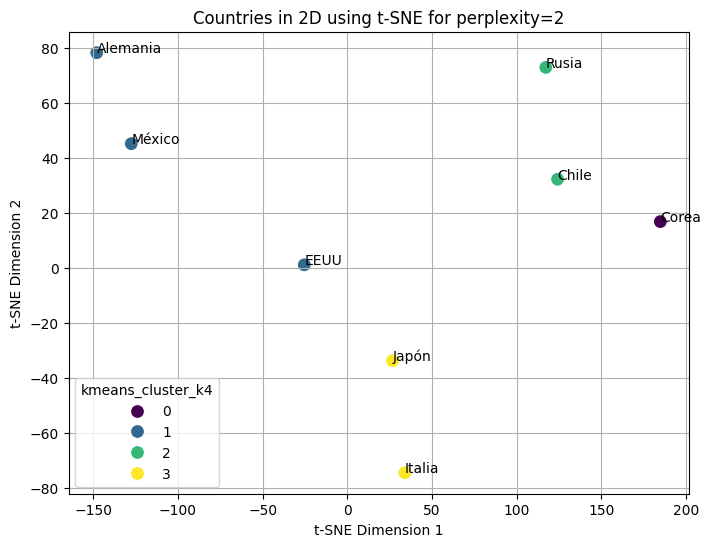

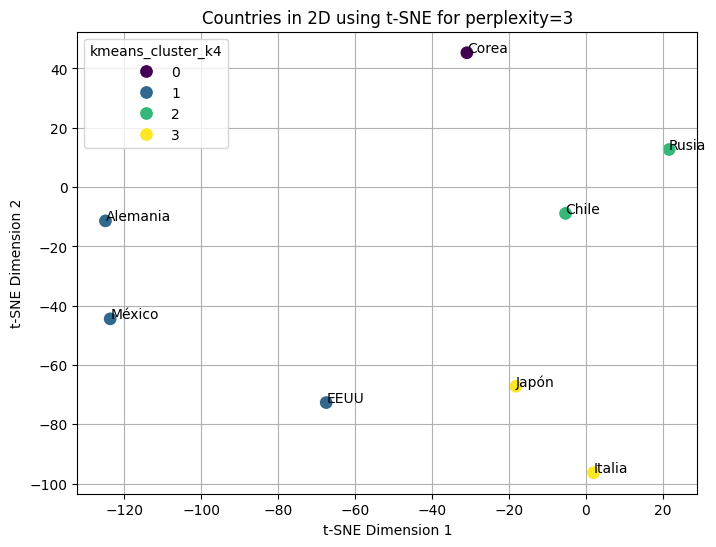

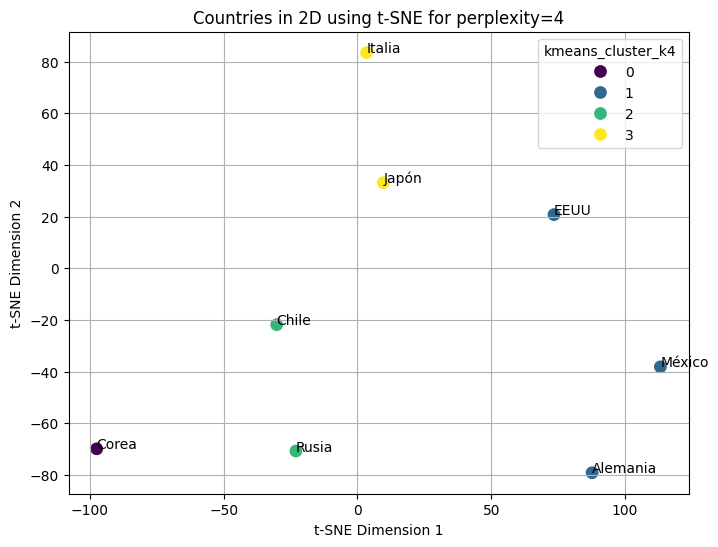

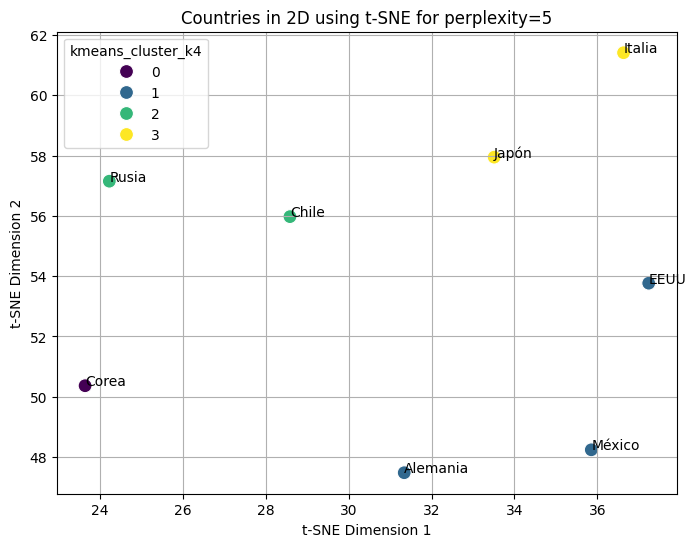

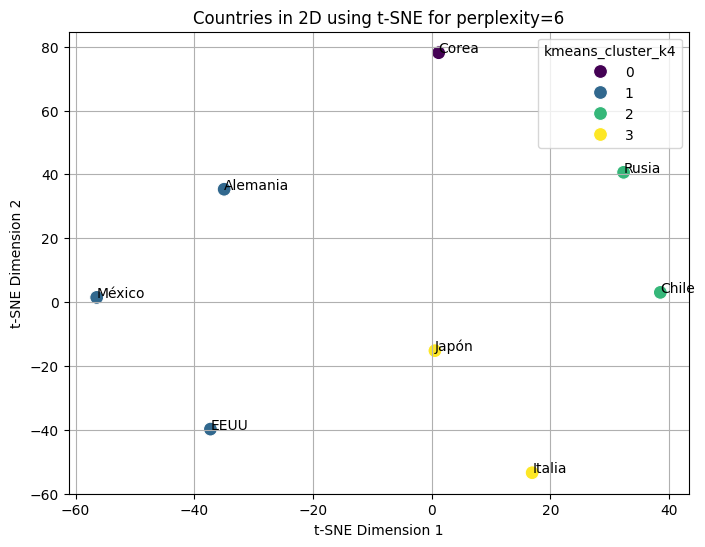

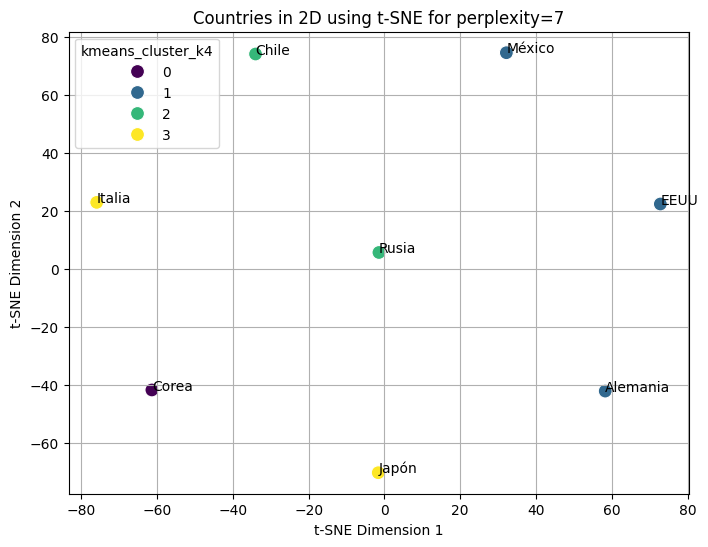

In [19]:
# aplicar t-SNE
# perplexity must be less than n_samples
perplexity_values = range(1,8)

for perplexity in perplexity_values:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X_tsne = tsne.fit_transform(df_tsne.drop(['País'], axis=1))

    # Visualizar
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_kmeans['kmeans_cluster_k4'], s=100, palette='viridis')
    for i, country in enumerate(df['País']):
        plt.text(X_tsne[i, 0], X_tsne[i, 1], country)
    plt.title(f"Countries in 2D using t-SNE for perplexity={perplexity}")
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True)
    plt.show()

4. Análisis de resultados y conclusiones (1 punto) Comparación de métodos:
* Explica las diferencias entre K-Means, clustering jerárquico y DBSCAN. ¿Cuál funcionó mejor en este caso y por qué?
* Compara los resultados obtenidos con PCA y t-SNE. ¿Cuál técnica permitió visualizar mejor la relación entre los países?

**Interpretación:**
* ¿Los clusters obtenidos reflejan similitudes culturales o geográficas en la música?
* Relaciona los resultados con tendencias globales en consumo musical.

In [21]:
diferencias = f"""
#Comparación de Métodos de Clusterización


Los métodos utilizados para la clusterización fueron Kmeans, clustering jerárquico y DBSCAN. Las principales diferencias para estos 3 algoritmos son:
*   K-Means forma agrupaciones esféricas mediante la búsqueda de centros de agrupación (centroides) y requiere que se especifique de antemano el número de agrupaciones (K).
*   La Clusterización Jerárquica construye un árbol de agrupaciones, ya sea mediante la fusión (aglomerativa) o la división (divisiva), y ofrece un dendrograma para visualizar las relaciones.
*   DBSCAN se basa en la densidad, identifica automáticamente agrupaciones de forma arbitraria y gestiona el ruido etiquetando los valores atípicos por separado, pero requiere un ajuste cuidadoso de sus parámetros (ε y MinPts).


En este caso, fue más fácil utilizar el Kmeans, debido a que el parámetro K fue encontrado por medio del método del codo y el coeficiente de silueta. Lo que lo hace más simple que los otros modelos.


"""
display(Markdown(diferencias))


comparacion_pca_tsne = f"""
#Comparación de PCA y t-SNE


## PCA:
*   Para la visualización con los 2 componentes principales usando PCA distribuye la data en la gráfica de manera de que al utilizar los colores para los paises desde Kmeans (con k=4), agrupa los países en 4 clusters descritos a continuación:


|         |Cluster 0|Cluster 1|Cluster 2|Cluster 3|
|---------|---------|---------|---------|---------|
PCA|Corea|EEUU-México-Alemania|Rusia-Chile|Italia-Japón|


Esa distribución es la misma obtenida con Kmeans usando k=4 y con el Clustering Jerárquico utilizando el método 'Ward'


## t-SNE:
*   En el caso de t-SNE, la visualización del modelo en 2D, se generó variando el parámetro de 'perplexity' considerando los números entre 1 y 7. En las gráficas obtenidas se aprecia que los países a medida que el valor de 'perplexity' aumenta se separan espacialmente de manera que no se logra apreciar alguna agrupación entre ellos. Al revés, con perplexity=1, se generan 3 grupos muy marcados donde los puntos están casi uno sobre otros, pero con perplexity 2 o 3 los países se dispersan muy similar a lo obtenido con PCA, pudiendo identificarse 4 clusters (los mismos que se obtuvieron con PCA) pero dispersos de manera diferente en la gráfica.


**En general, ambos modelos para este dataset fueron similares en los resultados si es que comparamos el PCA con el t-SNE usando perplexity=2 o 3. No se aprecian mayores diferencias entre la información que entrega uno con respecto al otro, por lo que no se puede afirmar que uno sea mejor. Esto puede deberse a que el dataset utilizado es pequeño y por lo mismo hace difícil tratar de modelar cualquier comportamiento con tan poca información**


"""
display(Markdown(comparacion_pca_tsne))


interpretación = f"""
#Interpretación


*  La agrupación que más se repitió, fue la siguiente


|         |Cluster 0|Cluster 1|Cluster 2|Cluster 3|
|---------|---------|---------|---------|---------|
Países|Corea|EEUU-México-Alemania|Rusia-Chile|Italia-Japón|


#Conclusiones


Según esto se entiende que Corea es un país que no tiene mucho en común con otro de los países del set de datos. También se puede observar que las agrupaciones que los algoritmos hicieron no necesariamente consideraron similitudes geográficas, por ejemplo en distintos algoritmos se genero el cluster que contiene a Italia-Japón y el de Chile-Rusia y esos pares de países no se parecen mucho culturalmente y tampoco están cerca geográficamente.


Considerando las tendencias actuales donde el Pop, Hip-Hop y Electrónica son de los estilos de música más escuchado, la clusterización agrupó países como Japón e Italia que tienen una alta preferencia a escuchar música Hip-Hop y Electrónica. Pero además de esa similitud con el consumo de estilos de música actual no hay otra.




"""
display(Markdown(interpretacion))



#Comparación de Métodos de Clusterización


Los métodos utilizados para la clusterización fueron Kmeans, clustering jerárquico y DBSCAN. Las principales diferencias para estos 3 algoritmos son:
*   K-Means forma agrupaciones esféricas mediante la búsqueda de centros de agrupación (centroides) y requiere que se especifique de antemano el número de agrupaciones (K).
*   La Clusterización Jerárquica construye un árbol de agrupaciones, ya sea mediante la fusión (aglomerativa) o la división (divisiva), y ofrece un dendrograma para visualizar las relaciones.
*   DBSCAN se basa en la densidad, identifica automáticamente agrupaciones de forma arbitraria y gestiona el ruido etiquetando los valores atípicos por separado, pero requiere un ajuste cuidadoso de sus parámetros (ε y MinPts).


En este caso, fue más fácil utilizar el Kmeans, debido a que el parámetro K fue encontrado por medio del método del codo y el coeficiente de silueta. Lo que lo hace más simple que los otros modelos.





#Comparación de PCA y t-SNE


## PCA:
*   Para la visualización con los 2 componentes principales usando PCA distribuye la data en la gráfica de manera de que al utilizar los colores para los paises desde Kmeans (con k=4), agrupa los países en 4 clusters descritos a continuación:


|         |Cluster 0|Cluster 1|Cluster 2|Cluster 3|
|---------|---------|---------|---------|---------|
PCA|Corea|EEUU-México-Alemania|Rusia-Chile|Italia-Japón|


Esa distribución es la misma obtenida con Kmeans usando k=4 y con el Clustering Jerárquico utilizando el método 'Ward'


## t-SNE:
*   En el caso de t-SNE, la visualización del modelo en 2D, se generó variando el parámetro de 'perplexity' considerando los números entre 1 y 7. En las gráficas obtenidas se aprecia que los países a medida que el valor de 'perplexity' aumenta se separan espacialmente de manera que no se logra apreciar alguna agrupación entre ellos. Al revés, con perplexity=1, se generan 3 grupos muy marcados donde los puntos están casi uno sobre otros, pero con perplexity 2 o 3 los países se dispersan muy similar a lo obtenido con PCA, pudiendo identificarse 4 clusters (los mismos que se obtuvieron con PCA) pero dispersos de manera diferente en la gráfica.


**En general, ambos modelos para este dataset fueron similares en los resultados si es que comparamos el PCA con el t-SNE usando perplexity=2 o 3. No se aprecian mayores diferencias entre la información que entrega uno con respecto al otro, por lo que no se puede afirmar que uno sea mejor. Esto puede deberse a que el dataset utilizado es pequeño y por lo mismo hace difícil tratar de modelar cualquier comportamiento con tan poca información**





#Interpretación

*  La agrupacion que mas se repitio, fue la siguiente

|         |Cluster 0|Cluster 1|Cluster 2|Cluster 3|
|---------|---------|---------|---------|---------|
Paises|Corea|EEUU-México-Alemania|Rusia-Chile|Italia-Japón|

#Conclusiones

Segun esto se entiende que Corea es un pais que no tiene mucho en comun con otro de los paises del set de datos. Tambien se puede observar que las agrupaciones que los algoritmos hicieron no necesariamente consideraron similitudes geograficas, por ejemplo en distintos algoritmos se genero el cluster que contiene a Italia-Japon y el de Chile-Rusia y esos pares de paises no se parecen mucho culturalmente y tampoco estan cerca geograficamente.

Considerando las tendencias actuales donde el Pop, Hip-Hop y Electronica son de los estilos de musica mas escuchado, la clusterizacin agrupo paises como Japon e Italia que tienen una alta preferencia a escuchar musica Hip-Hop y Electronica. Pero ademas de esa similitud con el consumo de estilos de musica actual no hay otra. 


